<a href="https://colab.research.google.com/github/Kanabee/08042023/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import metrics

In [ ]:
#download data
!gdown 'https://drive.google.com/uc?id=1ky87luZzKgZk2yJPMxZkM6QMPZKRJXrP' -O marketing_campaign.csv

Downloading...
From: https://drive.google.com/uc?id=1ky87luZzKgZk2yJPMxZkM6QMPZKRJXrP
To: /content/marketing_campaign.csv
100% 220k/220k [00:00<00:00, 19.4MB/s]


In [ ]:
#Loading the dataset
data = pd.read_csv("/content/marketing_campaign.csv", sep="\t")
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2240


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [ ]:
#People
data[['ID','Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','Dt_Customer','Recency','Complain']]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  Complain  
0            0  04-09-2012       58         0  
1            1  08-03-2014       38         0  
2            0  21-08-2013       26         0  
3            0  10-02-2014       26         0  
4            0  19-01-2014       94         0  
...        ...         ...      ...       ...  
2235         1  13-06-2013       46         0  
2236         1  10-06-2014       56         0  
2237         0  25-01-2014       91         0  
2238         1  24-01-2014        8         0  
2239         1  15-10-2012       40         0  

[2240 rows x 10 columns]

In [ ]:
#Products
data[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0          635         88              546              172                88   
1           11          1                6                2                 1   
2          426         49              127              111                21   
3           11          4               20               10                 3   
4          173         43              118               46                27   
...        ...        ...              ...              ...               ...   
2235       709         43              182               42               118   
2236       406          0               30                0                 0   
2237       908         48              217               32                12   
2238       428         30              214               80                30   
2239        84          3               61                2                 1   

      MntGoldProds  
0               88  
1                6  
2               42  
3                5  
4               15  
...            ...  
2235           247  
2236             8  
2237            24  
2238            61  
2239            21  

[2240 rows x 6 columns]

In [ ]:
#Promotion
data[['NumDealsPurchases','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']]

NumDealsPurchases  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
0                     3             0             0             0   
1                     2             0             0             0   
2                     1             0             0             0   
3                     2             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  2             0             0             0   
2236                  7             1             0             0   
2237                  1             0             0             0   
2238                  2             0             0             0   
2239                  3             0             0             0   

      AcceptedCmp4  AcceptedCmp5  Response  
0                0             0         1  
1                0             0         0  
2                0             0         0  
3                0             0         0  
4                0             0         0  
...            ...           ...       ...  
2235             0             0         0  
2236             0             0         0  
2237             1             0         0  
2238             0             0         0  
2239             0             0         1  

[2240 rows x 7 columns]

In [ ]:
#Place
data[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]

NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  
0                     7  
1                     5  
2                     4  
3                     6  
4                     5  
...                 ...  
2235                  5  
2236                  7  
2237                  6  
2238                  3  
2239                  7  

[2240 rows x 4 columns]

In [ ]:
#Information on features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
#To remove the NA values
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


In [ ]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in the records:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in the records: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


<ipython-input-9-35cd4afe7021>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])


In [ ]:
dates[:10]

[datetime.date(2012, 4, 9),
 datetime.date(2014, 8, 3),
 datetime.date(2013, 8, 21),
 datetime.date(2014, 10, 2),
 datetime.date(2014, 1, 19),
 datetime.date(2013, 9, 9),
 datetime.date(2012, 11, 13),
 datetime.date(2013, 8, 5),
 datetime.date(2013, 6, 6),
 datetime.date(2014, 3, 13)]

Creating a feature ("Customer_For") of the number of days the customers started to shop in the store relative to the last recorded date

In [ ]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)

In [ ]:
days[:10]

[datetime.timedelta(days=971),
 datetime.timedelta(days=125),
 datetime.timedelta(days=472),
 datetime.timedelta(days=65),
 datetime.timedelta(days=321),
 datetime.timedelta(days=453),
 datetime.timedelta(days=753),
 datetime.timedelta(days=488),
 datetime.timedelta(days=548),
 datetime.timedelta(days=268)]

In [ ]:
data["Customer_For"] = days

In [ ]:
data["Customer_For"]

0      971 days
1      125 days
2      472 days
3       65 days
4      321 days
         ...   
2235   541 days
2236    61 days
2237   315 days
2238   316 days
2239   782 days
Name: Customer_For, Length: 2216, dtype: timedelta64[ns]

In [ ]:
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

In [ ]:
data["Customer_For"]

0       83894400000000000
1       10800000000000000
2       40780800000000000
3        5616000000000000
4       27734400000000000
              ...        
2235    46742400000000000
2236     5270400000000000
2237    27216000000000000
2238    27302400000000000
2239    67564800000000000
Name: Customer_For, Length: 2216, dtype: int64

In [ ]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [ ]:
#Feature Engineering
#Age of customer today
data["Age"] = 2022-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [ ]:
data.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  Customer_For  \
count   2216.000000   2216.000000  2216.000000  2216.000000  2.216000e+03   
mean       0.064079      0.013538     0.009477     0.150271  4.423735e+16   
std        0.244950      0.115588     0.096907     0.357417  2.008532e+16   
min        0.000000      0.000000     0.000000     0.000000  0.000000e+00   
25%        0.000000      0.000000     0.000000     0.000000  2.937600e+16   
50%        0.000000      0.000000     0.000000     0.000000  4.432320e+16   
75%        0.000000      0.000000     0.000000     0.000000  5.927040e+16   
max        1.000000      1.000000     1.000000     1.000000  9.184320e+16   

               Age        Spent     Children  Family_Size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean     53.179603   607.075361     0.947202     2.592509     0.714350  
std      11.985554   602.900476     0.749062     0.905722     0.451825  
min      26.000000     5.000000     0.000000     1.000000     0.000000  
25%      45.000000    69.000000     0.000000     2.000000     0.000000  
50%      52.000000   396.500000     1.000000     3.000000     1.000000  
75%      63.000000  1048.000000     1.000000     3.000000     1.000000  
max     129.000000  2525.000000     3.000000     5.000000     1.000000  

[8 rows x 28 columns]

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

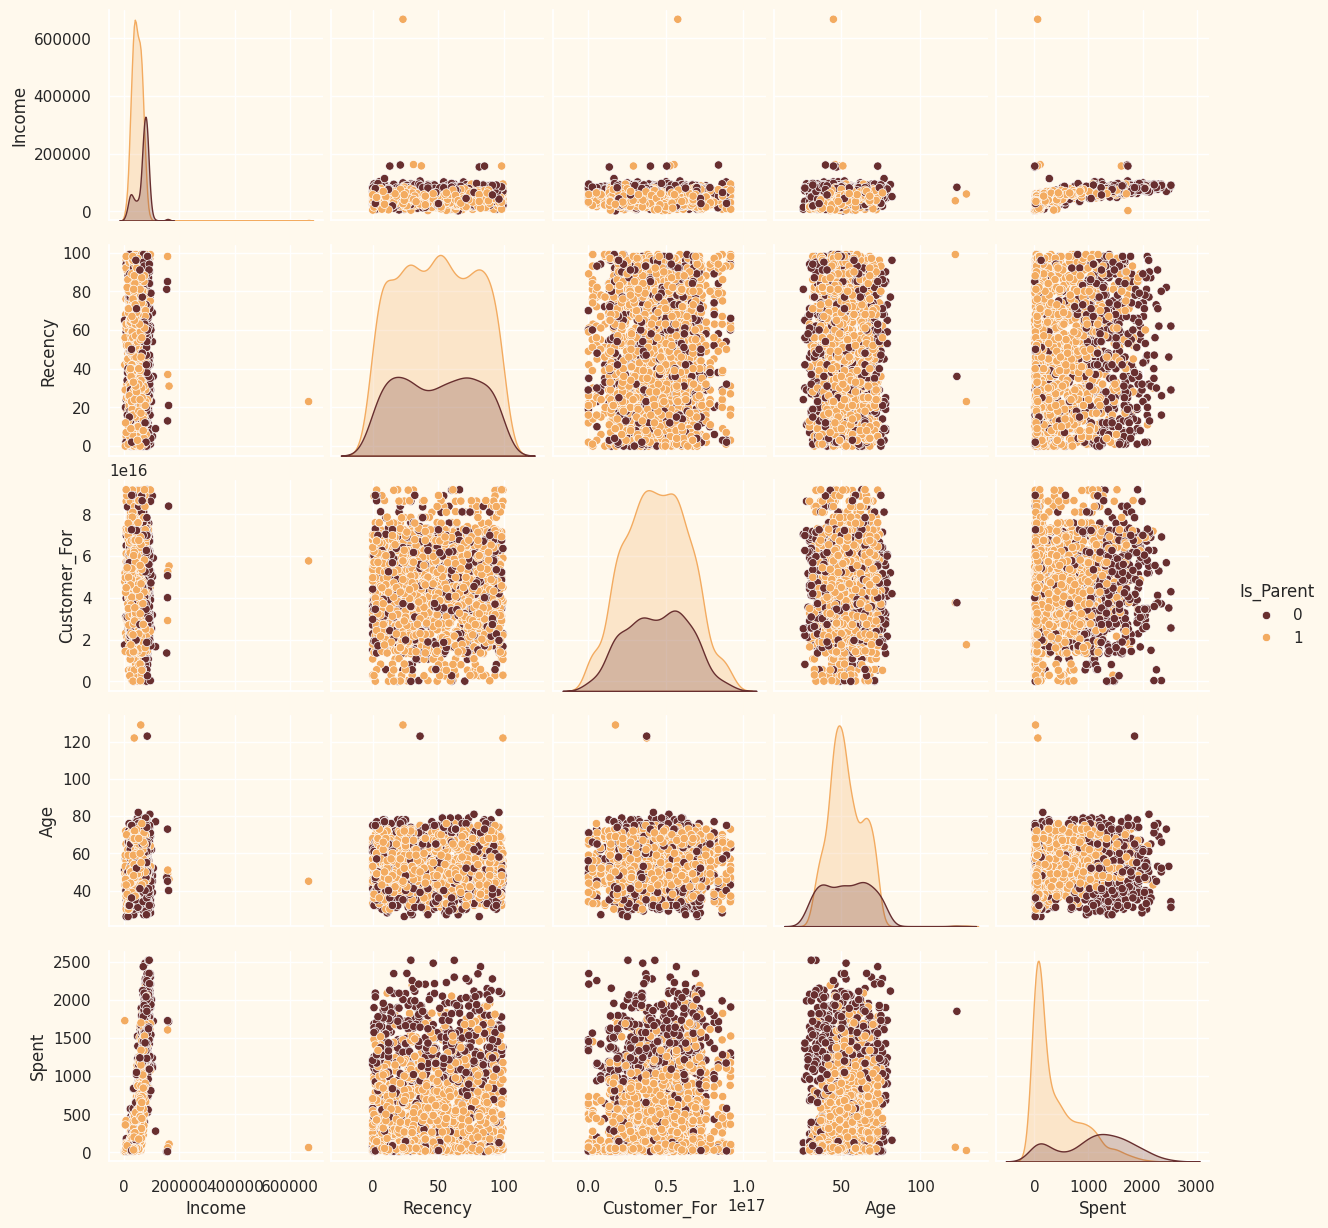

In [ ]:
#To plot some selected features
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue
plt.show()

In [ ]:
#Dropping the outliers by setting a cap on Age and income.
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


<ipython-input-22-892fb852166c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat= data.corr()


<Axes: >

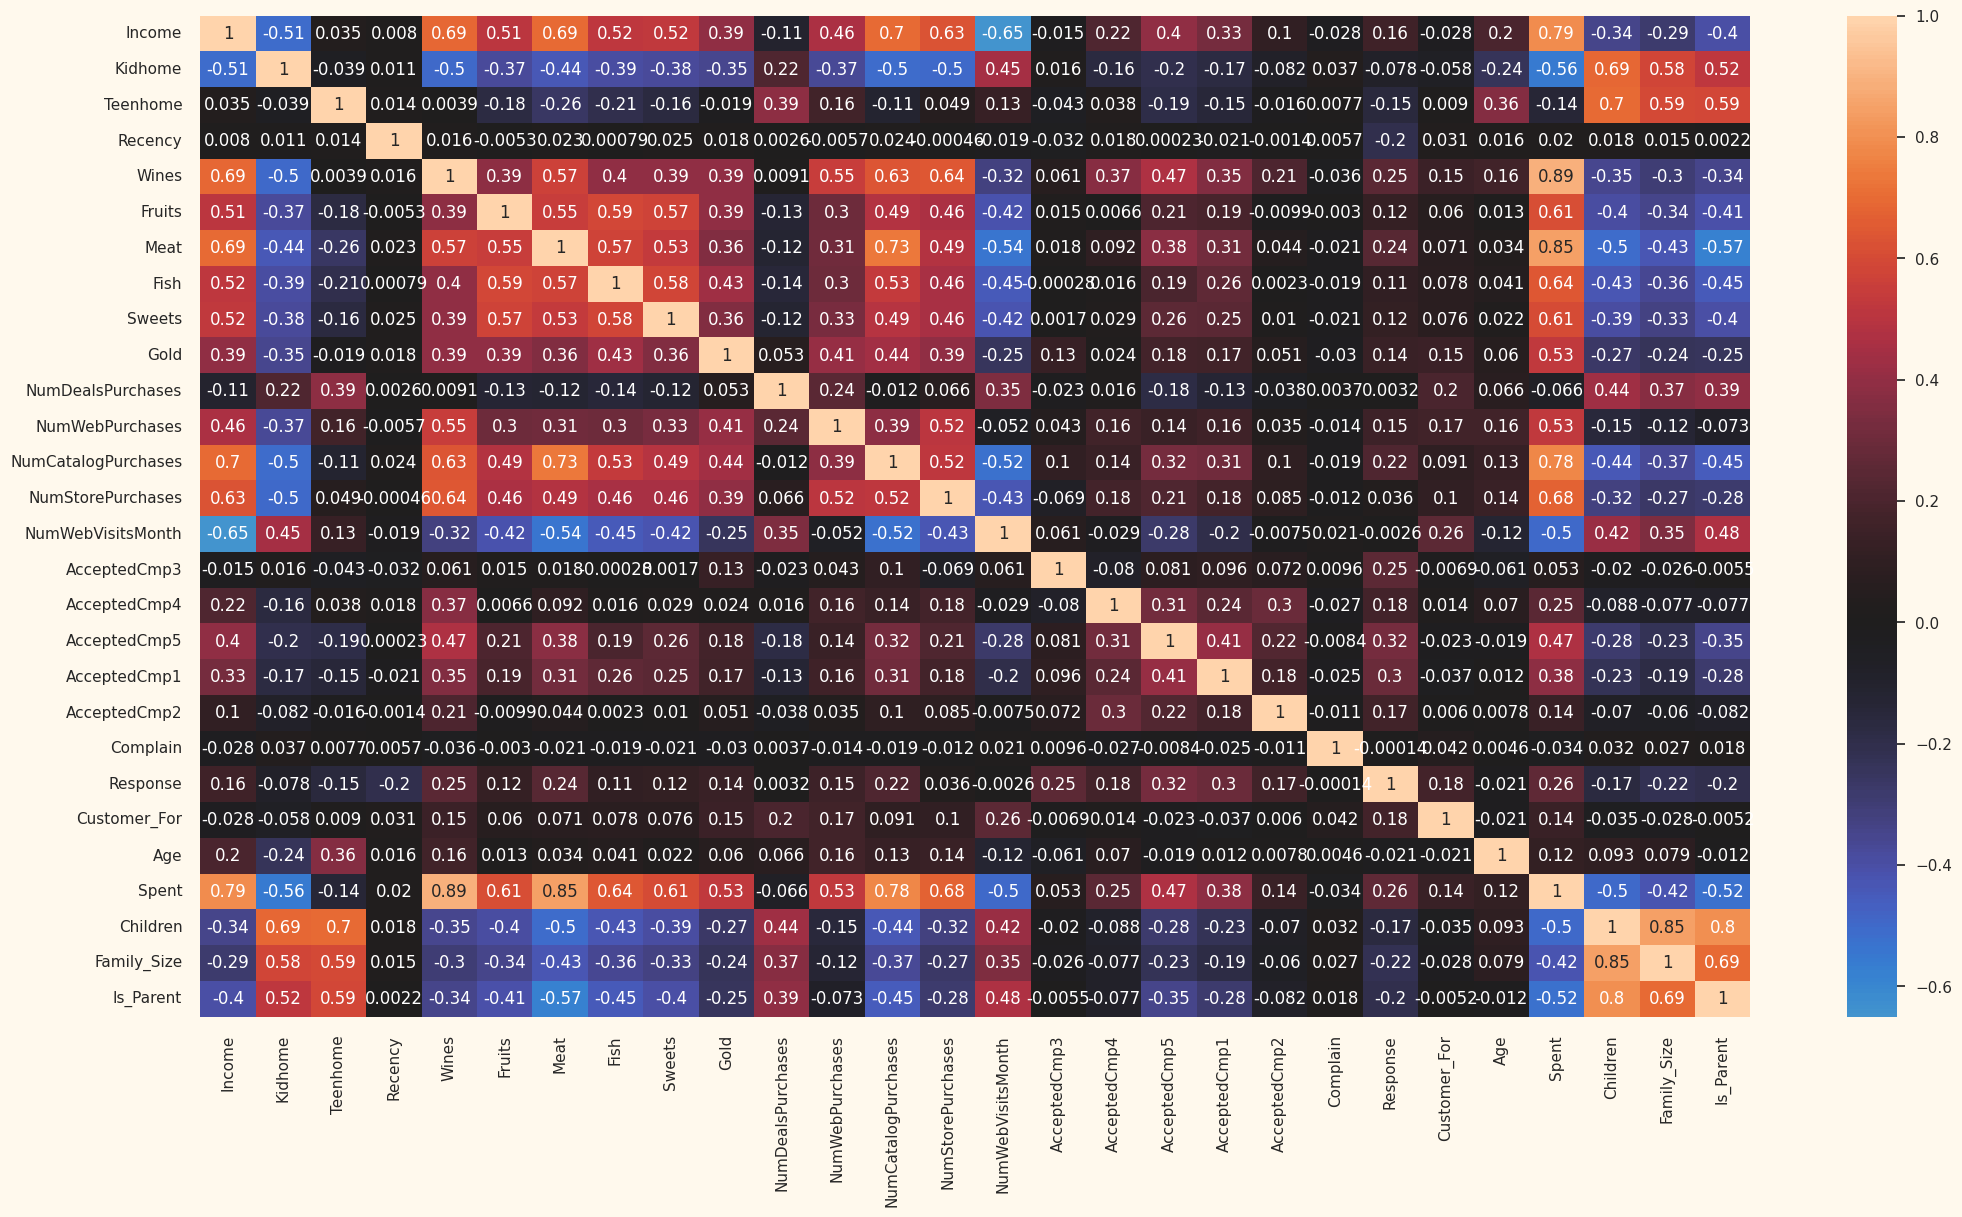

In [ ]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(25,13))
sns.heatmap(corrmat,annot=True, center=0)

DATA PREPROCESSING

In [ ]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [ ]:
data[['Living_With','Education']]

Living_With     Education
0          Alone      Graduate
1          Alone      Graduate
2        Partner      Graduate
3        Partner      Graduate
4        Partner  Postgraduate
...          ...           ...
2235     Partner      Graduate
2236     Partner  Postgraduate
2237       Alone      Graduate
2238     Partner  Postgraduate
2239     Partner  Postgraduate

[2212 rows x 2 columns]

In [ ]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

print("All features are now numerical")

All features are now numerical


In [ ]:
data[['Living_With','Education']]

Living_With  Education
0               0          0
1               0          0
2               1          0
3               1          0
4               1          1
...           ...        ...
2235            1          0
2236            1          1
2237            0          0
2238            1          1
2239            1          1

[2212 rows x 2 columns]

In [ ]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

In [ ]:
ds

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0             0  58138.0        0         0       58    635      88   546   
1             0  46344.0        1         1       38     11       1     6   
2             0  71613.0        0         0       26    426      49   127   
3             0  26646.0        1         0       26     11       4    20   
4             1  58293.0        1         0       94    173      43   118   
...         ...      ...      ...       ...      ...    ...     ...   ...   
2235          0  61223.0        0         1       46    709      43   182   
2236          1  64014.0        2         1       56    406       0    30   
2237          0  56981.0        0         0       91    908      48   217   
2238          1  69245.0        0         1        8    428      30   214   
2239          1  52869.0        1         1       40     84       3    61   

      Fish  Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0      172      88  ...                   10                  4   
1        2       1  ...                    1                  2   
2      111      21  ...                    2                 10   
3       10       3  ...                    0                  4   
4       46      27  ...                    3                  6   
...    ...     ...  ...                  ...                ...   
2235    42     118  ...                    3                  4   
2236     0       0  ...                    2                  5   
2237    32      12  ...                    3                 13   
2238    80      30  ...                    5                 10   
2239     2       1  ...                    1                  4   

      NumWebVisitsMonth       Customer_For  Age  Spent  Living_With  Children  \
0                     7  83894400000000000   65   1617            0         0   
1                     5  10800000000000000   68     27            0         2   
2                     4  40780800000000000   57    776            1         0   
3                     6   5616000000000000   38     53            1         1   
4                     5  27734400000000000   41    422            1         1   
...                 ...                ...  ...    ...          ...       ...   
2235                  5  46742400000000000   55   1341            1         1   
2236                  7   5270400000000000   76    444            1         3   
2237                  6  27216000000000000   41   1241            0         0   
2238                  3  27302400000000000   66    843            1         1   
2239                  7  67564800000000000   68    172            1         2   

      Family_Size  Is_Parent  
0               1          0  
1               3          1  
2               2          0  
3               3          1  
4               3          1  
...           ...        ...  
2235            3          1  
2236            5          1  
2237            1          0  
2238            3          1  
2239            4          1  

[2212 rows x 23 columns]

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int64  
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   i

In [ ]:
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
scaled_ds

Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0     -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1     -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2     -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3     -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4      0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   
...         ...       ...       ...       ...       ...       ...       ...   
2207  -0.893586  0.430444 -0.822754  0.908097 -0.104347  1.197084  0.419540   
2208   0.571657  0.560123  2.902796  0.908097  0.241237  0.298631 -0.662628   
2209  -0.893586  0.233347 -0.822754 -0.929699  1.450778  1.787156  0.545373   
2210   0.571657  0.803172 -0.822754  0.908097 -1.417564  0.363866  0.092373   
2211   0.571657  0.042290  1.040021  0.908097 -0.311697 -0.656159 -0.587128   

          Meat      Fish    Sweets  ...  NumCatalogPurchases  \
0     1.690293  2.453472  1.483713  ...             2.503607   
1    -0.718230 -0.651004 -0.634019  ...            -0.571340   
2    -0.178542  1.339513 -0.147184  ...            -0.229679   
3    -0.655787 -0.504911 -0.585335  ...            -0.913000   
4    -0.218684  0.152508 -0.001133  ...             0.111982   
...        ...       ...       ...  ...                  ...   
2207  0.066770  0.079461  2.213965  ...             0.111982   
2208 -0.611184 -0.687527 -0.658360  ...            -0.229679   
2209  0.222878 -0.103155 -0.366260  ...             0.111982   
2210  0.209498  0.773403  0.071892  ...             0.795303   
2211 -0.472917 -0.651004 -0.634019  ...            -0.571340   

      NumStorePurchases  NumWebVisitsMonth  Customer_For       Age     Spent  \
0             -0.555814           0.692181      1.973583  1.018352  1.676245   
1             -1.171160          -0.132545     -1.665144  1.274785 -0.963297   
2              1.290224          -0.544908     -0.172664  0.334530  0.280110   
3             -0.555814           0.279818     -1.923210 -1.289547 -0.920135   
4              0.059532          -0.132545     -0.822130 -1.033114 -0.307562   
...                 ...                ...           ...       ...       ...   
2207          -0.555814          -0.132545      0.124112  0.163575  1.218061   
2208          -0.248141           0.692181     -1.940414  1.958607 -0.271040   
2209           2.213242           0.279818     -0.847936 -1.033114  1.052052   
2210           1.290224          -0.957271     -0.843635  1.103830  0.391336   
2211          -0.555814           0.692181      1.160676  1.274785 -0.722584   

      Living_With  Children  Family_Size  Is_Parent  
0       -1.349603 -1.264598    -1.758359  -1.581139  
1       -1.349603  1.404572     0.449070   0.632456  
2        0.740959 -1.264598    -0.654644  -1.581139  
3        0.740959  0.069987     0.449070   0.632456  
4        0.740959  0.069987     0.449070   0.632456  
...           ...       ...          ...        ...  
2207     0.740959  0.069987     0.449070   0.632456  
2208     0.740959  2.739158     2.656499   0.632456  
2209    -1.349603 -1.264598    -1.758359  -1.581139  
2210     0.740959  0.069987     0.449070   0.632456  
2211     0.740959  1.404572     1.552784   0.632456  

[2212 rows x 23 columns]

In [ ]:
scaled_ds.describe()

Education        Income       Kidhome      Teenhome       Recency  \
count  2.212000e+03  2.212000e+03  2.212000e+03  2.212000e+03  2.212000e+03   
mean   1.445498e-17 -1.252765e-16  4.175884e-17  9.636656e-17  4.015273e-18   
std    1.000226e+00  1.000226e+00  1.000226e+00  1.000226e+00  1.000226e+00   
min   -8.935862e-01 -2.333791e+00 -8.227535e-01 -9.296987e-01 -1.694030e+00   
25%   -8.935862e-01 -7.771113e-01 -8.227535e-01 -9.296987e-01 -8.646302e-01   
50%   -8.935862e-01 -2.731156e-02 -8.227535e-01 -9.296987e-01 -6.717941e-04   
75%    5.716567e-01  7.679525e-01  1.040021e+00  9.080971e-01  8.632866e-01   
max    2.036900e+00  5.131311e+00  2.902796e+00  2.745893e+00  1.727245e+00   

              Wines        Fruits          Meat          Fish        Sweets  \
count  2.212000e+03  2.212000e+03  2.212000e+03  2.212000e+03  2.212000e+03   
mean   4.898633e-17  1.043971e-17  3.212219e-18 -1.204582e-17  3.212219e-18   
std    1.000226e+00  1.000226e+00  1.000226e+00  1.000226e+00  1.000226e+00   
min   -9.052351e-01 -6.626279e-01 -7.449911e-01 -6.875269e-01 -6.583604e-01   
25%   -8.340705e-01 -6.122946e-01 -6.736275e-01 -6.327421e-01 -6.340186e-01   
50%   -3.848445e-01 -4.612945e-01 -4.416956e-01 -4.683875e-01 -4.636265e-01   
75%    5.921851e-01  1.678727e-01  2.908968e-01  2.255541e-01  1.449170e-01   
max    3.521791e+00  4.345543e+00  6.948902e+00  4.042233e+00  5.719175e+00   

       ...  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
count  ...         2.212000e+03       2.212000e+03       2.212000e+03   
mean   ...        -8.672990e-17      -7.107033e-17       1.092154e-16   
std    ...         1.000226e+00       1.000226e+00       1.000226e+00   
min    ...        -9.130004e-01      -1.786506e+00      -2.194360e+00   
25%    ...        -9.130004e-01      -8.634873e-01      -9.572709e-01   
50%    ...        -2.296788e-01      -2.481413e-01       2.798177e-01   
75%    ...         4.536427e-01       6.748776e-01       6.921805e-01   
max    ...         8.653501e+00       2.213242e+00       6.052898e+00   

       Customer_For           Age         Spent   Living_With      Children  \
count  2.212000e+03  2.212000e+03  2.212000e+03  2.212000e+03  2.212000e+03   
mean  -1.397315e-16  6.183521e-17  5.942604e-17 -2.730386e-17  2.248553e-17   
std    1.000226e+00  1.000226e+00  1.000226e+00  1.000226e+00  1.000226e+00   
min   -2.202781e+00 -2.315280e+00 -9.998189e-01 -1.349603e+00 -1.264598e+00   
25%   -7.404087e-01 -6.912026e-01 -8.935732e-01 -1.349603e+00 -1.264598e+00   
50%    3.680820e-03 -9.285849e-02 -3.490638e-01  7.409586e-01  6.998729e-02   
75%    7.477704e-01  8.473966e-01  7.316544e-01  7.409586e-01  6.998729e-02   
max    2.369283e+00  2.471473e+00  3.183607e+00  7.409586e-01  2.739158e+00   

        Family_Size     Is_Parent  
count  2.212000e+03  2.212000e+03  
mean   2.505530e-16  1.606109e-17  
std    1.000226e+00  1.000226e+00  
min   -1.758359e+00 -1.581139e+00  
25%   -6.546443e-01 -1.581139e+00  
50%    4.490700e-01  6.324555e-01  
75%    4.490700e-01  6.324555e-01  
max    2.656499e+00  6.324555e-01  

[8 rows x 23 columns]

CLUSTERING

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

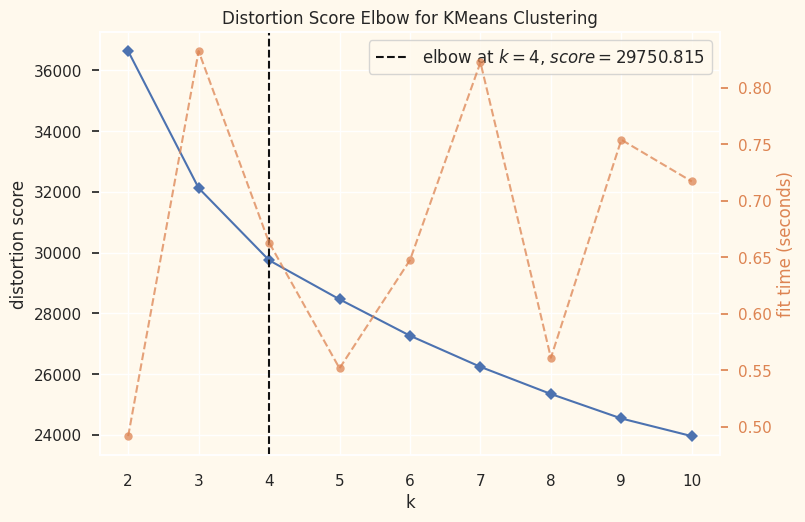

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(scaled_ds)
Elbow_M.show()

In [ ]:
#Initiating the Agglomerative Clustering model
km = KMeans(n_clusters=4, random_state=0)
# fit model and predict clusters
yhat_km = km.fit_predict(scaled_ds)
scaled_ds["Clusters"] = yhat_km
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_km

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


EVALUATING MODELS

<ipython-input-45-e75b13272484>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=data["Clusters"], palette= pal)


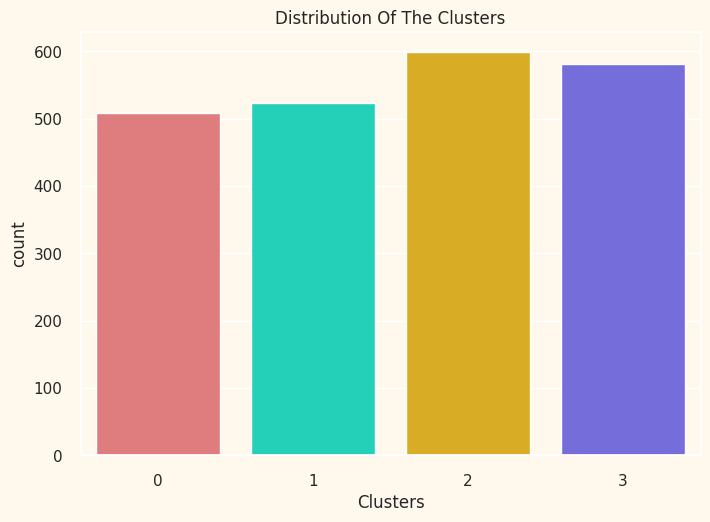

In [ ]:
#Plotting countplot of clusters
pal = ["#f06c6e","#07edcb", "#f7bb07","#655beb"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

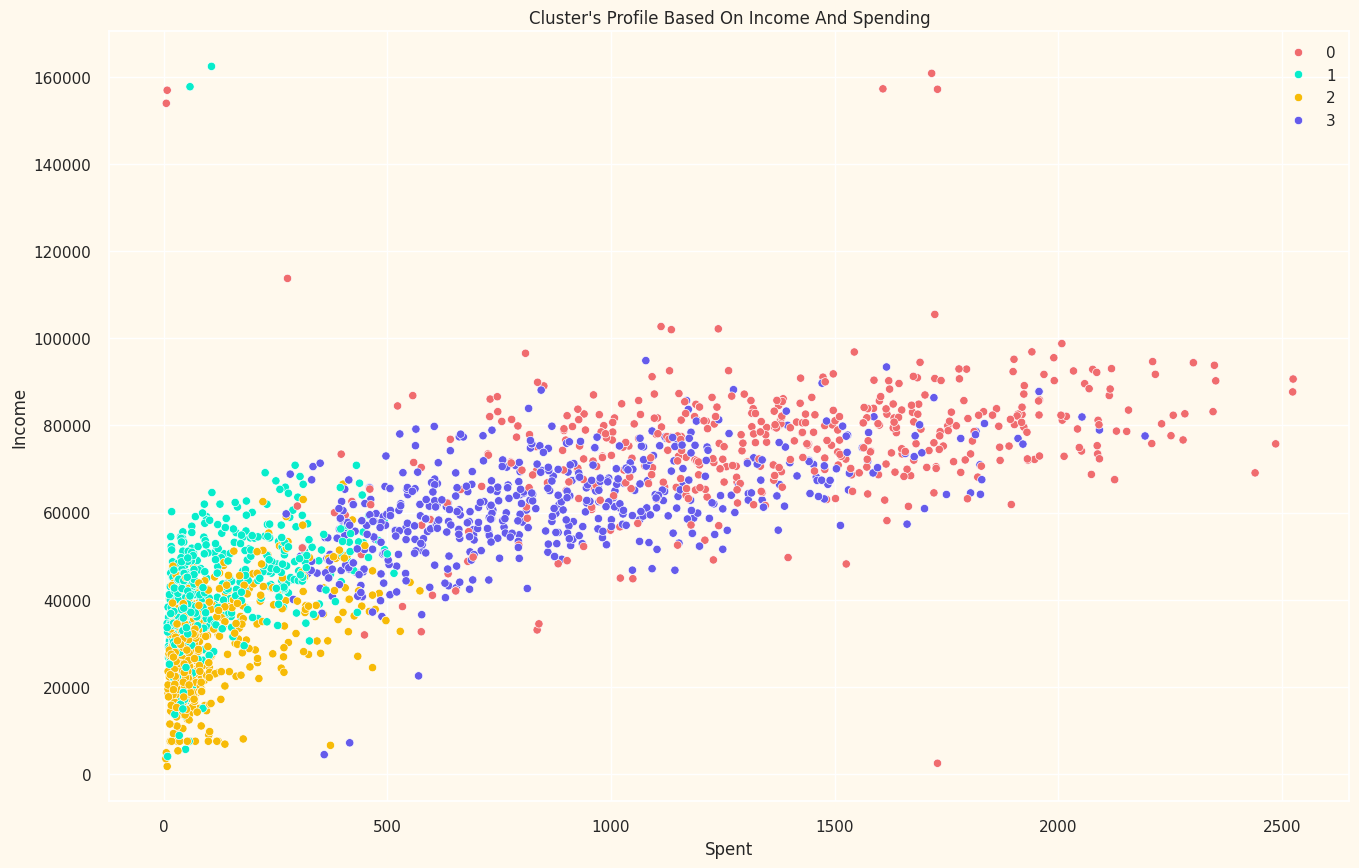

In [ ]:
plt.figure(figsize = (16,10))
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

group 0: high spending & high income

group 1: high spending & low income

group 2: low spending & low income

group 3: high spending & average income

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 33.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 50.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-47-b2ddc3e28607>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/ca

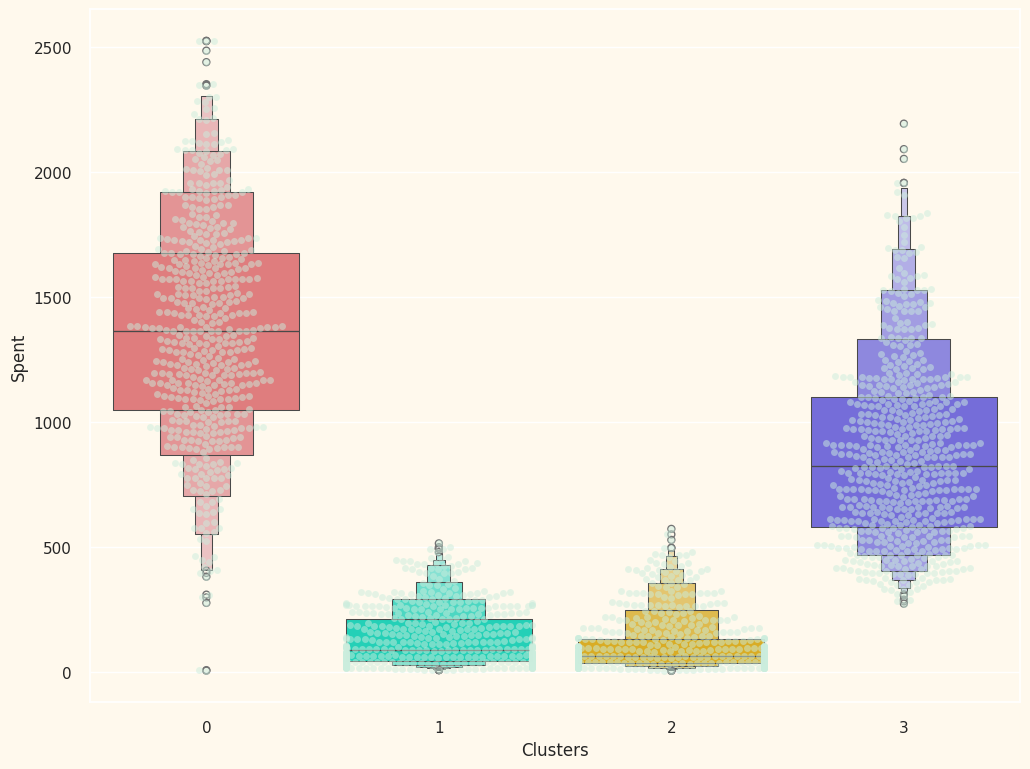

In [ ]:
plt.figure(figsize = (12,9))
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
plt.show()

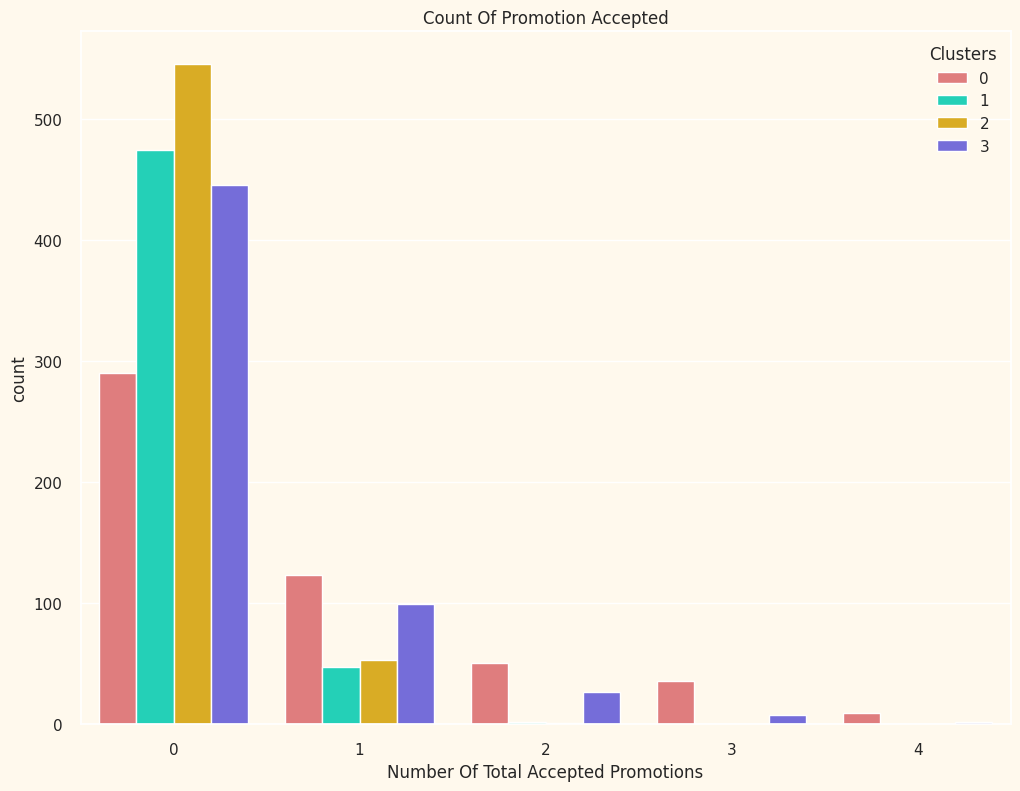

In [ ]:
#Creating a feature to get a sum of accepted promotions
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure(figsize = (12,9))
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

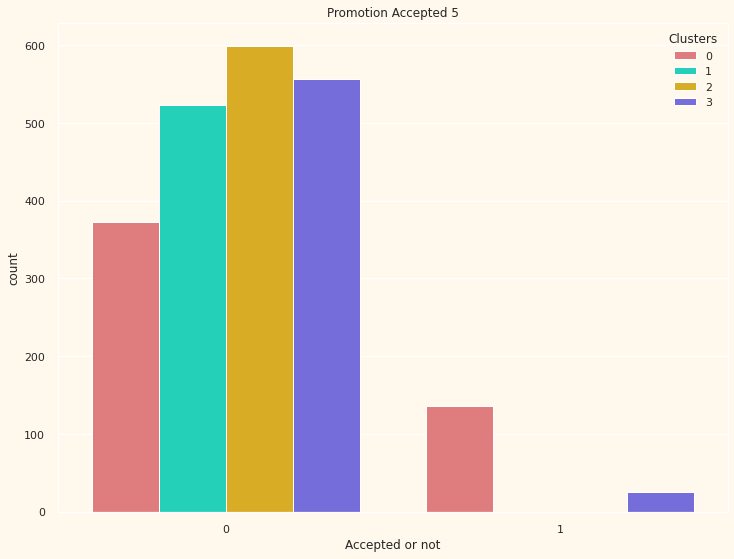

In [ ]:
plt.figure(figsize = (12,9))
pl = sns.countplot(x=data["AcceptedCmp5"],hue=data["Clusters"], palette= pal)
pl.set_title("Promotion Accepted 5")
pl.set_xlabel("Accepted or not")
plt.show()

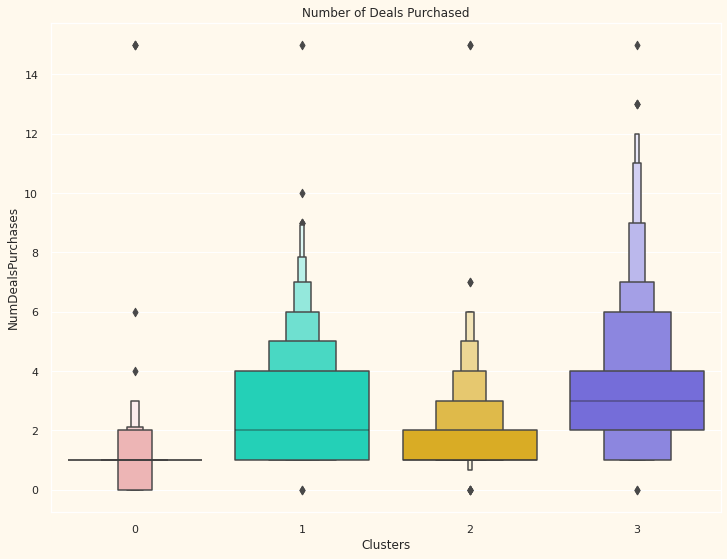

In [ ]:
#Plotting the number of deals purchased
plt.figure(figsize = (12,9))
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

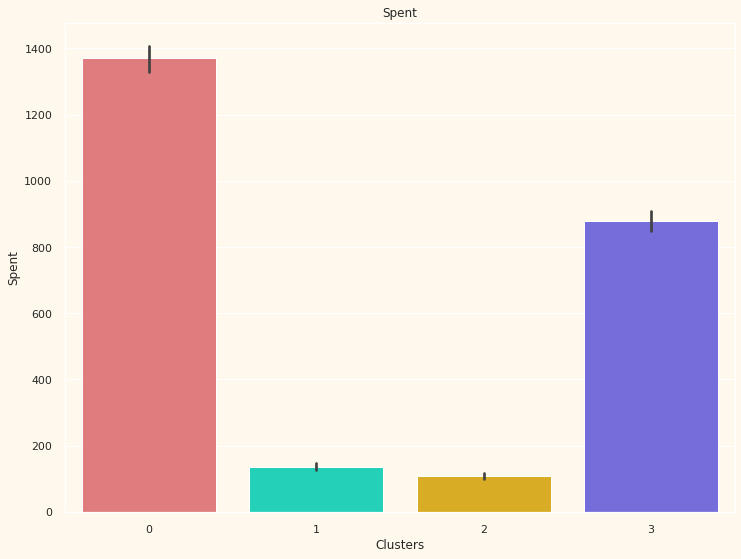

In [ ]:
plt.figure(figsize = (12,9))
pl=sns.barplot(y=data["Spent"],x=data["Clusters"], palette= pal)
pl.set_title("Spent")
plt.show()

In [ ]:
data["numtotal"] = data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']

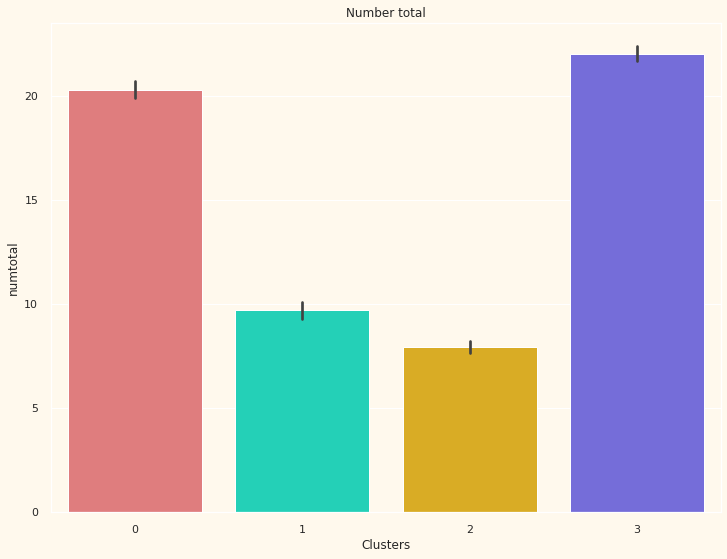

In [ ]:
plt.figure(figsize = (12,9))
pl=sns.barplot(y=data["numtotal"],x=data["Clusters"], palette= pal)
pl.set_title("Number total")
plt.show()

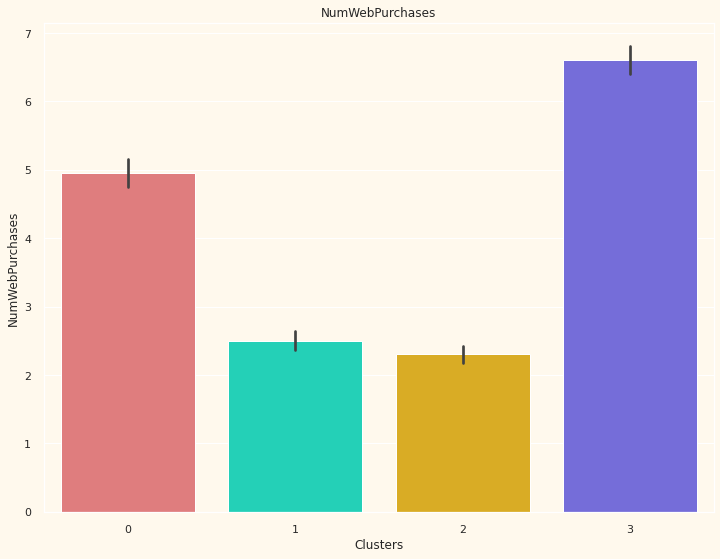

In [ ]:
plt.figure(figsize = (12,9))
pl=sns.barplot(y=data["NumWebPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("NumWebPurchases")
plt.show()

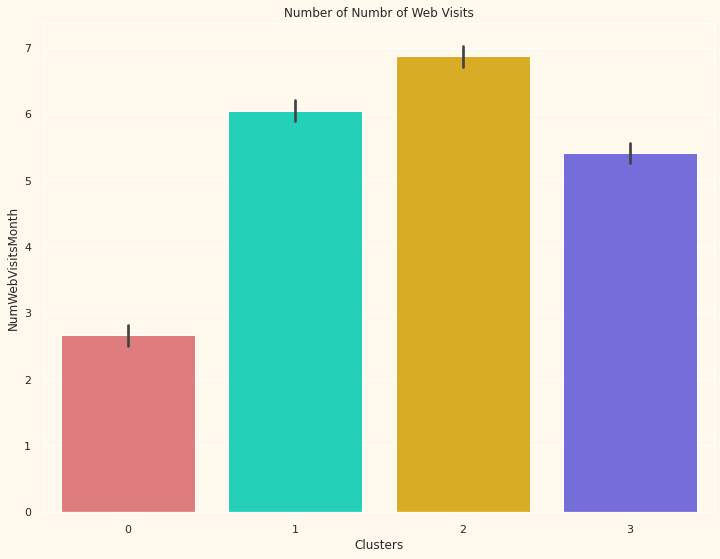

In [ ]:
plt.figure(figsize = (12,9))
pl=sns.barplot(y=data["NumWebVisitsMonth"],x=data["Clusters"], palette= pal)
pl.set_title("Number of Numbr of Web Visits")
plt.show()

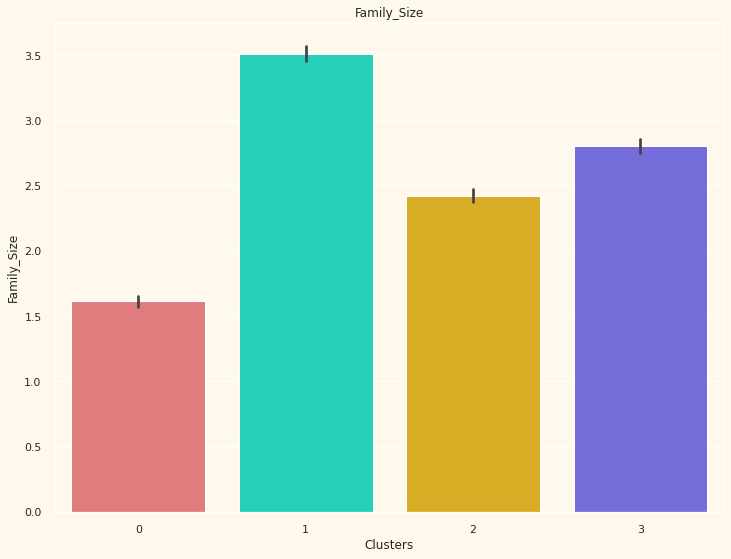

In [ ]:
plt.figure(figsize = (12,9))
pl=sns.barplot(y=data["Family_Size"],x=data["Clusters"], palette= pal)
pl.set_title("Family_Size")
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int64  
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   i

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

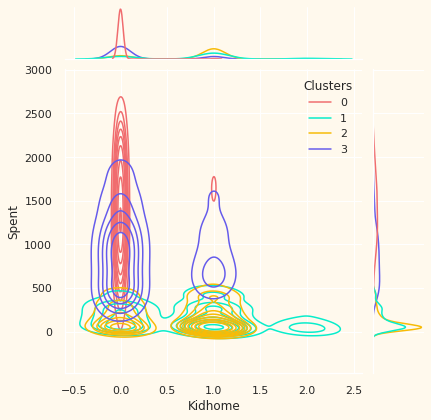

<Figure size 864x648 with 0 Axes>

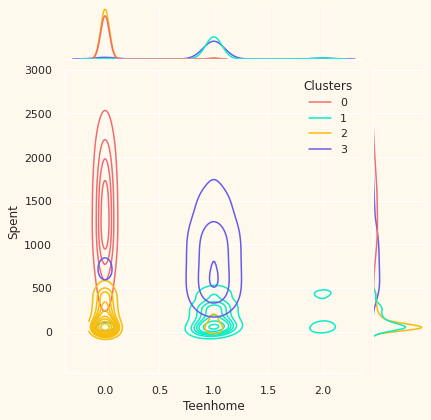

<Figure size 864x648 with 0 Axes>

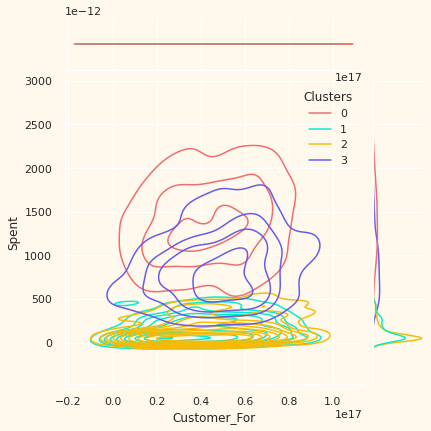

<Figure size 864x648 with 0 Axes>

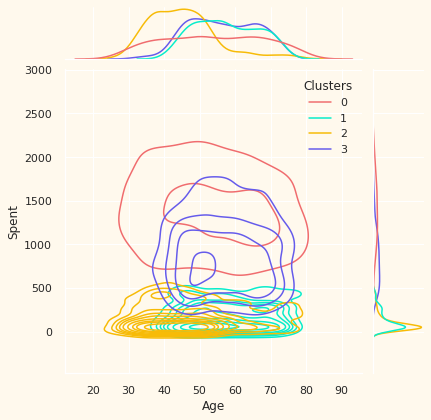

<Figure size 864x648 with 0 Axes>

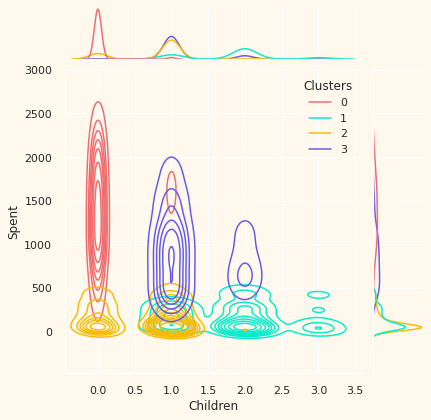

<Figure size 864x648 with 0 Axes>

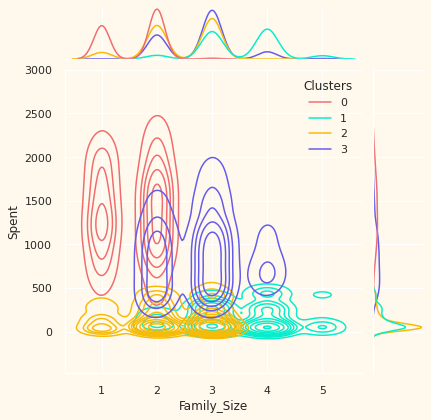

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 864x648 with 0 Axes>

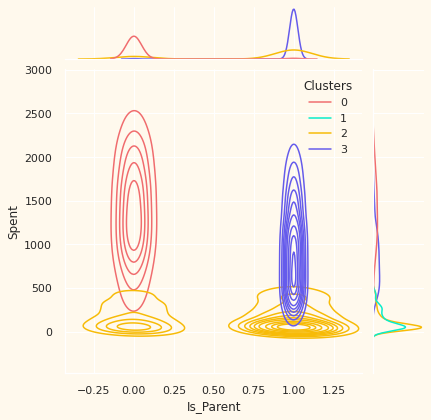

<Figure size 864x648 with 0 Axes>

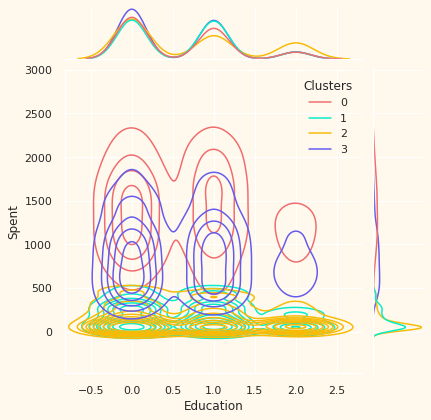

<Figure size 864x648 with 0 Axes>

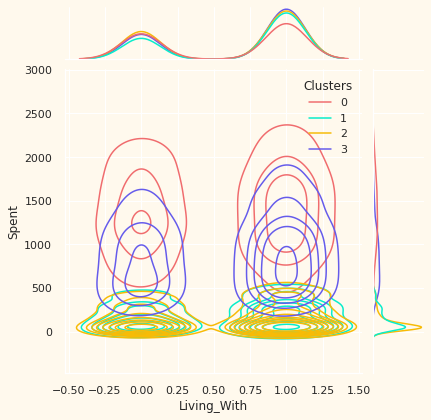

In [ ]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]
plt.figure(figsize = (12,9))
for i in Personal:
    plt.figure(figsize = (12,9))
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

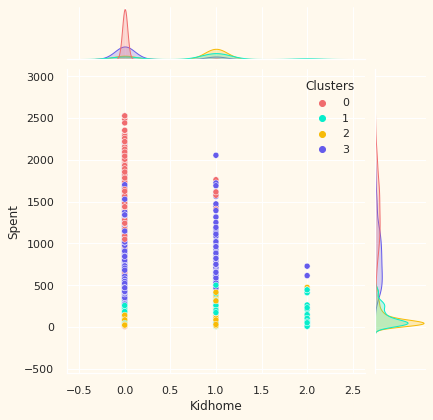

<Figure size 864x648 with 0 Axes>

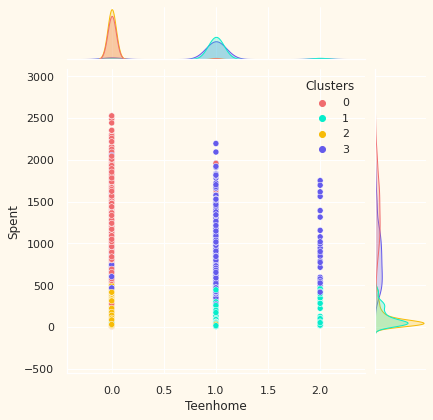

<Figure size 864x648 with 0 Axes>

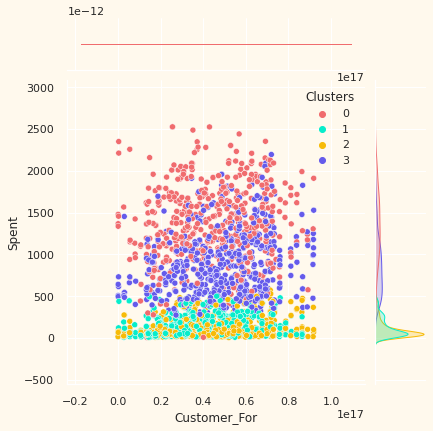

<Figure size 864x648 with 0 Axes>

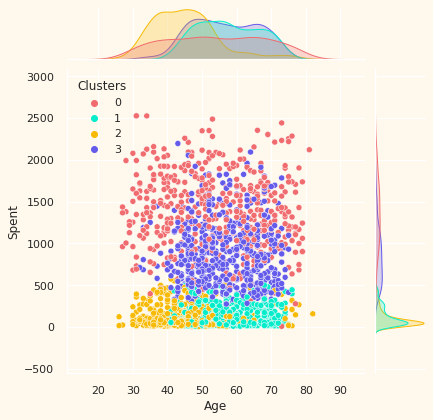

<Figure size 864x648 with 0 Axes>

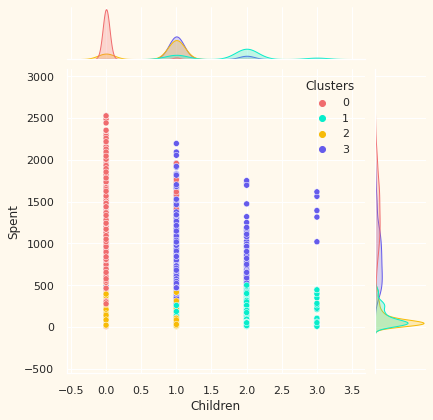

<Figure size 864x648 with 0 Axes>

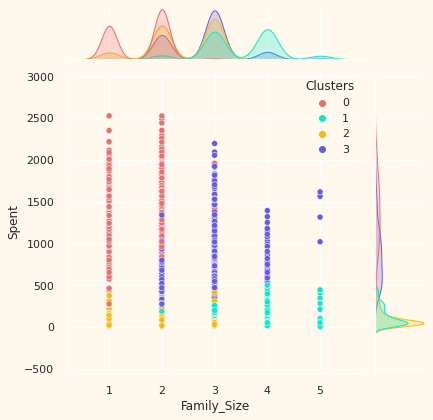

<Figure size 864x648 with 0 Axes>

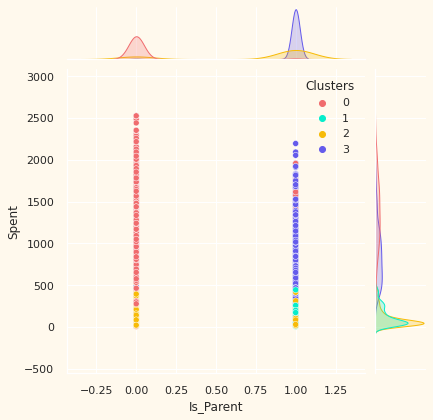

<Figure size 864x648 with 0 Axes>

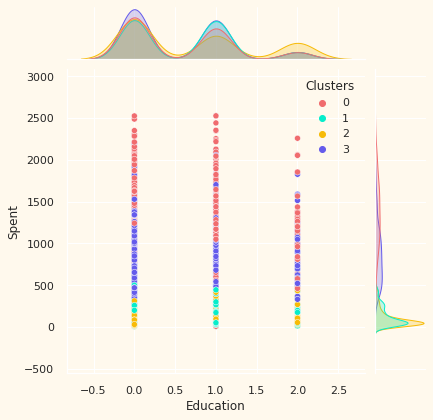

<Figure size 864x648 with 0 Axes>

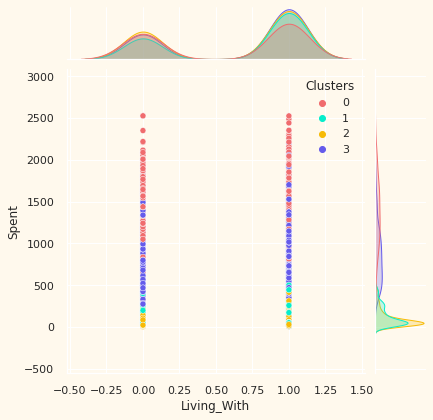

In [ ]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]
plt.figure(figsize = (12,9))
for i in Personal:
    plt.figure(figsize = (12,9))
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"],palette=pal)
    plt.show()

group 0: high spending & high income : Not parent , at the max only 2 members in the family

group 1: high spending & low income : parent, have a kid and teeneger at home


group 2: low spending & low income : younger, Most have a kid at home

group 3: high spending & average income : parent, most have a teeneger at home